## 🐾 PET ADOPTION PREDICTOR
### Project Overview
This project aims to build a Machine Learning system capable of predicting how many days an animal will stay in a shelter before being adopted (TimeInShelterDays). The prediction is based on various features such as physical traits, adoption history, and health condition.

Dataset
https://www.kaggle.com/code/edumisvieramartin/prediction-pets-adoption-anns-99-acc/input
### File: pet_adoption_data.csv
### Records: 2,007
### Main Features
1. PetType — Type of animal
2. Breed — Breed of the pet
3. AgeMonths — Pet’s age in months
4. WeightKg — Weight in kilograms
5. Vaccinated — Whether the pet has been vaccinated
6. HealthCondition — Current health status
7. AdoptionFee — Adoption cost
8. PreviousOwner — Indicates if the pet had a previous owner
### Purpose
The resulting model will help animal shelters optimize their adoption strategies by identifying pets at higher risk of long shelter stays. This will allow shelters to improve adoption rates and manage resources more efficiently.

## Información Básica (Columnas, Tipos, nulls, dulplicates) del Dataset
Se importan librerias.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Se carga el dataset.

In [8]:
df = pd.read_csv('../data/pet_adoption_data.csv')

Mostramos todas la columnas y las 5 primeras filas del dataframe.

In [9]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


Vemos información de las columnas.

In [10]:
df.shape

(2007, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


Miramos las Columnas.

In [12]:
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

Vemos los tipos de columnas que hay en PetType

In [13]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

Recuento del número de animales por PetType.

In [14]:
df['PetType'].value_counts().sort_values(ascending=True)

PetType
Bird      487
Rabbit    493
Cat       505
Dog       522
Name: count, dtype: int64

## Análisis de la Calidad de Datos.
-- Valores nulos, duplicados, outliers --
No hemos encontrado nulos, duplicados ni outliers.

Visualización Duplicados.

In [15]:
df.duplicated().sum()

np.int64(0)

Miramos nulos.

In [16]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

Según el análisis previo los datos están limpios.
No nulos ni duplicados.
Con la tabla limpia hacemos el EDA.

Análisis Exploratorio de Datos.
En esta sesión se realiza el anáisis descriptivo del DataSet.

Recuento de probabilidades de adopción según la columna AdoptionLikelihood.

In [17]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

Se agrupan los tipos de animales con más probabilidad e adopción.

In [18]:
adoptables = df[df['AdoptionLikelihood'] == 1]
adoptables[['PetType']].value_counts()

PetType
Dog        242
Bird       147
Cat        145
Rabbit     125
Name: count, dtype: int64

Hemos agrupado por condición de salud el tipo de animal.

In [19]:
df[df['HealthCondition'] == 1]['PetType'].value_counts()

PetType
Cat       111
Dog       100
Rabbit     96
Bird       87
Name: count, dtype: int64

Agrupamos según el tipo de animal y la raza.

In [20]:
df[df['HealthCondition'] == 1] \
  .groupby(['PetType', 'Breed']) \
  .size() \
  .sort_values(ascending=False)

PetType  Breed           
Rabbit   Rabbit              96
Bird     Parakeet            87
Cat      Persian             56
         Siamese             55
Dog      Poodle              38
         Labrador            33
         Golden Retriever    29
dtype: int64

In [21]:
medical = df[df['HealthCondition'] == 1]

In [22]:
medical_total = (
    medical
    .groupby(['PetType', 'Breed'])
    .size()
    .rename('TotalWithMedicalCondition')
)

In [23]:
medical_adoptable = (
    medical[medical['AdoptionLikelihood'] == 1]
    .groupby(['PetType', 'Breed'])
    .size()
    .rename('AdoptableWithMedicalCondition')
)

In [24]:
relation = pd.concat(
    [medical_total, medical_adoptable],
    axis=1
).fillna(0)

In [25]:
relation['AdoptionRate'] = (
    relation['AdoptableWithMedicalCondition'] /
    relation['TotalWithMedicalCondition']
) * 100

In [26]:
relation.sort_values(by='AdoptionRate').head(10)

TotalWithMedicalCondition  \
PetType Breed                                         
Cat     Persian                                  56   
Bird    Parakeet                                 87   
Rabbit  Rabbit                                   96   
Cat     Siamese                                  55   
Dog     Golden Retriever                         29   
        Poodle                                   38   
        Labrador                                 33   

                          AdoptableWithMedicalCondition  AdoptionRate  
PetType Breed                                                          
Cat     Persian                                       2      3.571429  
Bird    Parakeet                                      4      4.597701  
Rabbit  Rabbit                                        6      6.250000  
Cat     Siamese                                       4      7.272727  
Dog     Golden Retriever                              5     17.241379  
        Poodle                                        7     18.421053  
        Labrador                                     10     30.303030

In [27]:
relation = (
    df[df['HealthCondition'] == 1]
    .groupby(['PetType', 'Breed'])['AdoptionLikelihood']
    .agg(
        Total='count',
        Adoptable='sum'
    )
)
relation['AdoptionRate'] = relation['Adoptable'] / relation['Total'] * 100

In [28]:
relation.sort_values(by='AdoptionRate').head(10)

Total  Adoptable  AdoptionRate
PetType Breed                                           
Cat     Persian              56          2      3.571429
Bird    Parakeet             87          4      4.597701
Rabbit  Rabbit               96          6      6.250000
Cat     Siamese              55          4      7.272727
Dog     Golden Retriever     29          5     17.241379
        Poodle               38          7     18.421053
        Labrador             33         10     30.303030

## Análisis Bivariante Informativo sobre el resultado de las columnas

Se observa que la mayor probabilidad de adopción según el PetType es:
Perros	242
Aves	147
Gatos	145
Conejos	125
A su vez se observa que los animales que tienen mejor condición médica son más propensos a ser adoptados.

In [34]:
num_cols = [
    'AgeMonths',
    'WeightKg',
    'Vaccinated',
    'HealthCondition',
    'TimeInShelterDays',
    'AdoptionFee',
    'PreviousOwner'
]

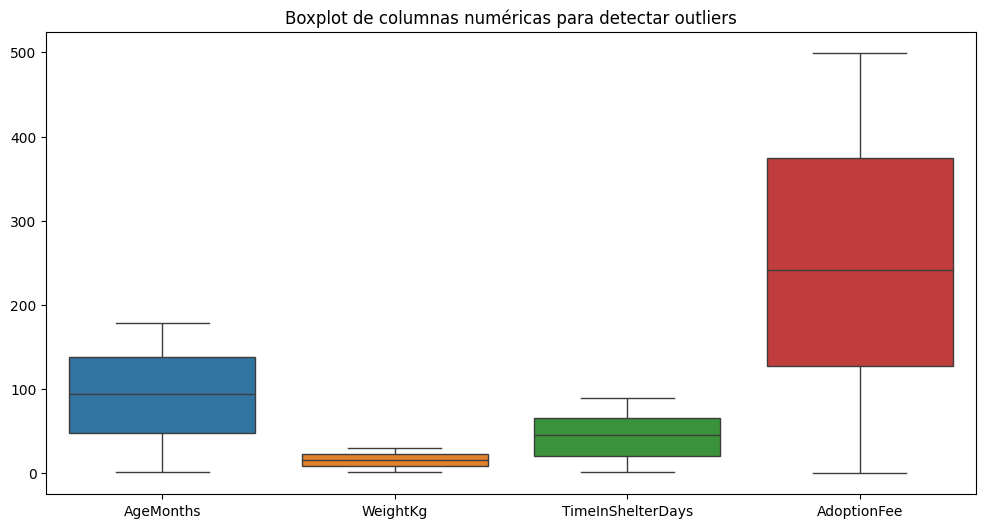

In [35]:
# Elegir columnas numéricas relevantes
cols_to_plot = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols_to_plot])
plt.title("Boxplot de columnas numéricas para detectar outliers")
plt.show()

count    2007.000000
mean       92.279522
std        52.148363
min         1.000000
25%        48.000000
50%        94.000000
75%       138.000000
max       179.000000
Name: AgeMonths, dtype: float64
Mediana: 94.0
Moda: 0    149
Name: AgeMonths, dtype: int64


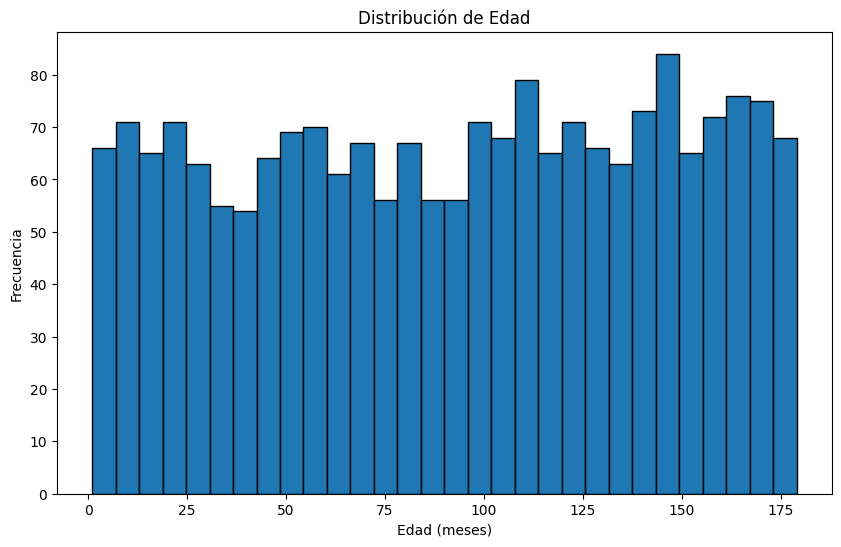

Skewness: -0.07201398476487748


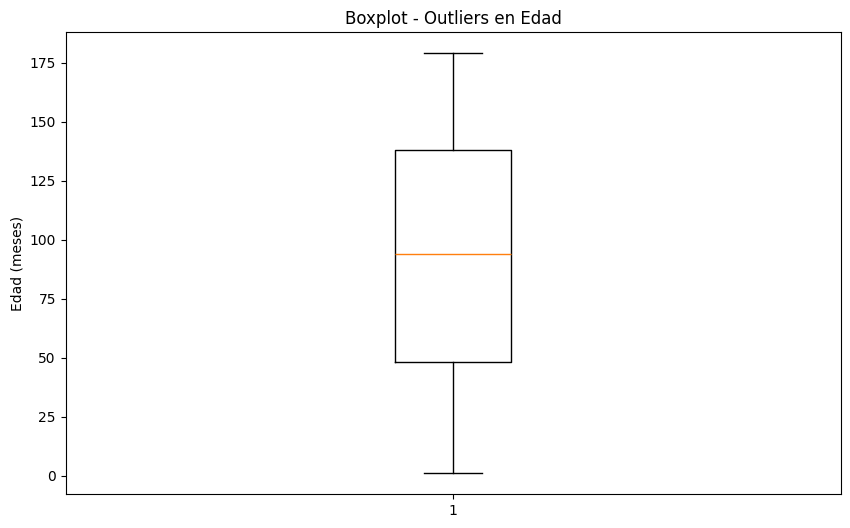

Número de outliers: 0


In [36]:
# Para CADA variable numérica, necesitáis saber:

# 1. Estadísticas descriptivas
print(df['AgeMonths'].describe())
print(f"Mediana: {df['AgeMonths'].median()}")
print(f"Moda: {df['AgeMonths'].mode()}")

# 2. Distribución (histograma)
plt.figure(figsize=(10, 6))
plt.hist(df['AgeMonths'], bins=30, edgecolor='black')
plt.xlabel('Edad (meses)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')
plt.show()

# 3. Asimetría (skewness)
from scipy.stats import skew
print(f"Skewness: {skew(df['AgeMonths'])}")
# > 1 = muy sesgada a la derecha
# < -1 = muy sesgada a la izquierda
# entre -0.5 y 0.5 = aproximadamente simétrica

# 4. Outliers (valores atípicos)
plt.figure(figsize=(10, 6))
plt.boxplot(df['AgeMonths'])
plt.title('Boxplot - Outliers en Edad')
plt.ylabel('Edad (meses)')
plt.show()

# Identificar outliers con IQR
Q1 = df['AgeMonths'].quantile(0.25)
Q3 = df['AgeMonths'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['AgeMonths'] < Q1 - 1.5*IQR) | (df['AgeMonths'] > Q3 + 1.5*IQR)]
print(f"Número de outliers: {len(outliers)}")

ESTADÍSTICAS DE TimeInShelterDays
count    2007.000000
mean       43.974091
std        25.740253
min         1.000000
25%        21.000000
50%        45.000000
75%        66.000000
max        89.000000
Name: TimeInShelterDays, dtype: float64

Mediana: 45.0
Moda: 15


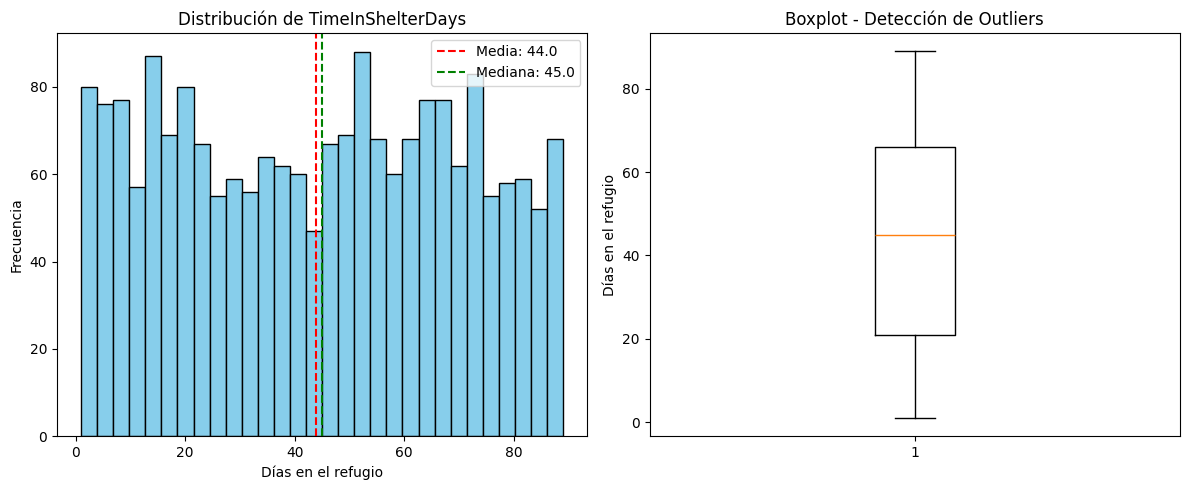


Skewness: 0.00
✅ OK: La distribución es aproximadamente simétrica

Outliers detectados: 0 (0.0% del dataset)
Rango normal: -46.5 a 133.5 días


In [37]:
# ============================================
# EDA-02: ANÁLISIS DE TimeInShelterDays
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np

# 1. ESTADÍSTICAS BÁSICAS
print("="*50)
print("ESTADÍSTICAS DE TimeInShelterDays")
print("="*50)
print(df['TimeInShelterDays'].describe())
print(f"\nMediana: {df['TimeInShelterDays'].median()}")
print(f"Moda: {df['TimeInShelterDays'].mode()[0]}")

# 2. DISTRIBUCIÓN (Histograma)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['TimeInShelterDays'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Días en el refugio')
plt.ylabel('Frecuencia')
plt.title('Distribución de TimeInShelterDays')
plt.axvline(df['TimeInShelterDays'].mean(), color='red', linestyle='--', label=f'Media: {df["TimeInShelterDays"].mean():.1f}')
plt.axvline(df['TimeInShelterDays'].median(), color='green', linestyle='--', label=f'Mediana: {df["TimeInShelterDays"].median():.1f}')
plt.legend()

# 3. BOXPLOT (para ver outliers)
plt.subplot(1, 2, 2)
plt.boxplot(df['TimeInShelterDays'])
plt.ylabel('Días en el refugio')
plt.title('Boxplot - Detección de Outliers')

plt.tight_layout()
plt.show()

# 4. SKEWNESS (Asimetría)
skewness = skew(df['TimeInShelterDays'])
print(f"\nSkewness: {skewness:.2f}")

if skewness > 1:
    print("⚠️ ALERTA: La distribución está MUY sesgada a la derecha")
    print("   → Necesitarás aplicar transformación logarítmica más adelante")
elif skewness < -1:
    print("⚠️ ALERTA: La distribución está MUY sesgada a la izquierda")
else:
    print("✅ OK: La distribución es aproximadamente simétrica")

# 5. IDENTIFICAR OUTLIERS
Q1 = df['TimeInShelterDays'].quantile(0.25)
Q3 = df['TimeInShelterDays'].quantile(0.75)
IQR = Q3 - Q1

outliers_lower = df['TimeInShelterDays'] < (Q1 - 1.5 * IQR)
outliers_upper = df['TimeInShelterDays'] > (Q3 + 1.5 * IQR)
total_outliers = outliers_lower.sum() + outliers_upper.sum()

print(f"\nOutliers detectados: {total_outliers} ({total_outliers/len(df)*100:.1f}% del dataset)")
print(f"Rango normal: {Q1 - 1.5*IQR:.1f} a {Q3 + 1.5*IQR:.1f} días")

### Correlaciones Heatmap

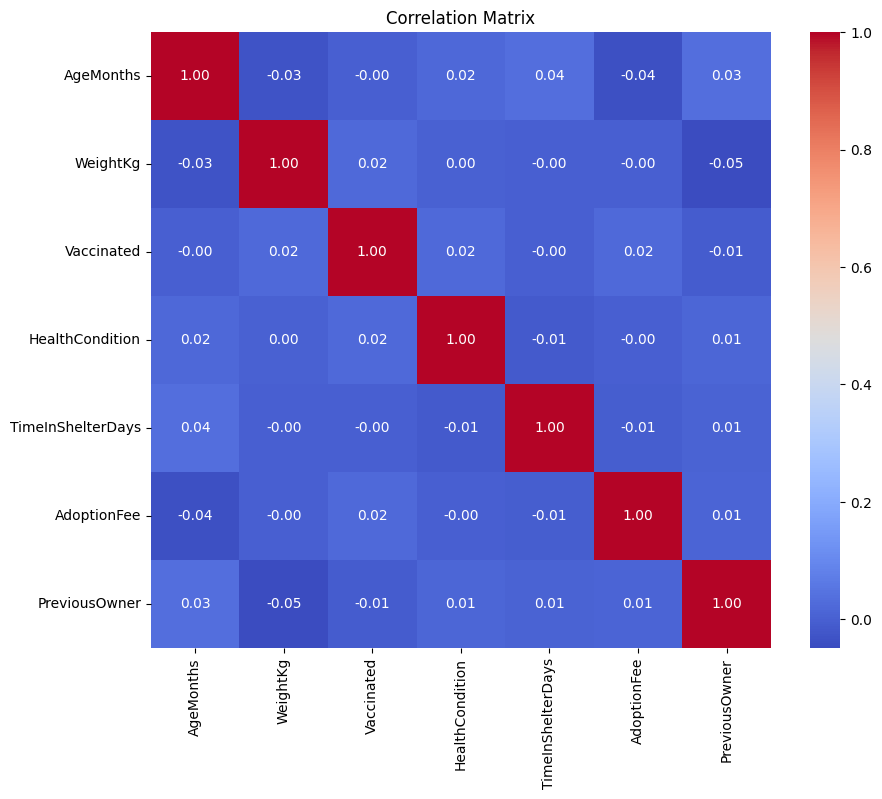

In [38]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Ninguna variable numérica parece predecir bien TimeInShelterDays por sí sola.

Esto sugiere que el tiempo que un animal permanece en el refugio no depende linealmente de edad, peso, vacunación, condición de salud, adopción o dueño previo.

#### Variables Binarias vs TimeInShelterDays

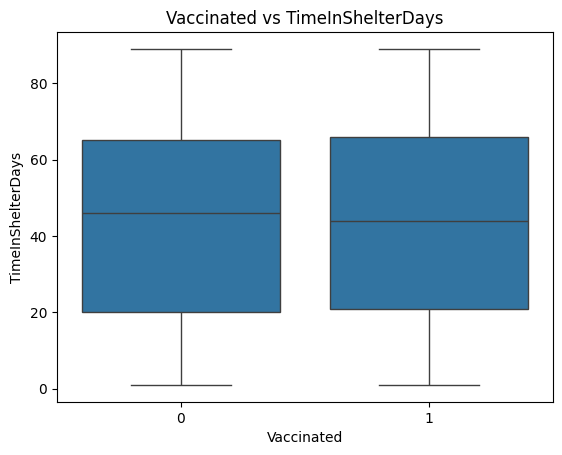

In [40]:
sns.boxplot(x='Vaccinated', y='TimeInShelterDays', data=df)
plt.title("Vaccinated vs TimeInShelterDays")
plt.show()


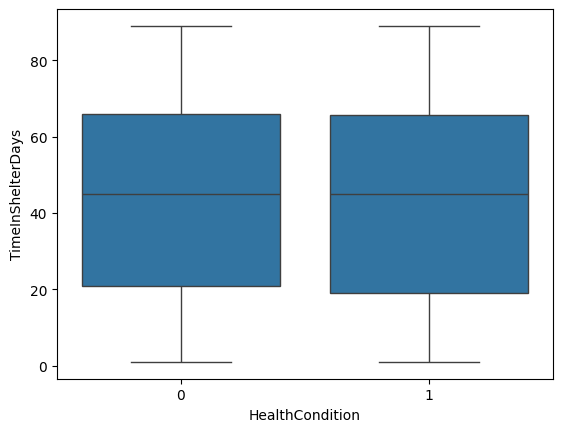

In [41]:
sns.boxplot(x='HealthCondition', y='TimeInShelterDays', data=df)
plt.show()


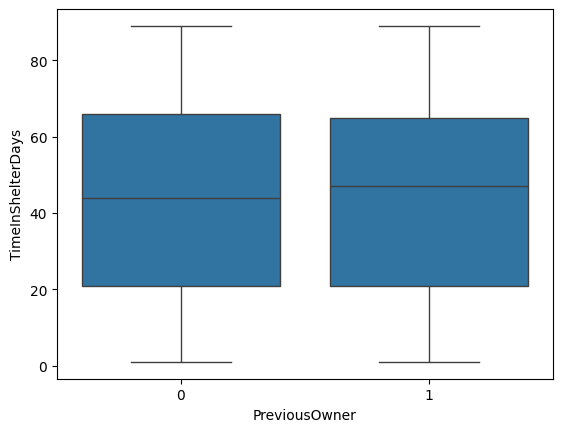

In [42]:
sns.boxplot(x='PreviousOwner', y='TimeInShelterDays', data=df)
plt.show()


#### Comparación de Medias

In [43]:
df.groupby('Vaccinated')['TimeInShelterDays'].mean()
df.groupby('HealthCondition')['TimeInShelterDays'].mean()
df.groupby('PreviousOwner')['TimeInShelterDays'].mean()


PreviousOwner
0    43.839400
1    44.285479
Name: TimeInShelterDays, dtype: float64

In [44]:
corr_target = corr['TimeInShelterDays'].sort_values(ascending=False)
print(corr_target)


TimeInShelterDays    1.000000
AgeMonths            0.036837
PreviousOwner        0.007958
WeightKg            -0.000980
Vaccinated          -0.001123
AdoptionFee         -0.007104
HealthCondition     -0.012664
Name: TimeInShelterDays, dtype: float64


### Variables vs Objetivos


In [45]:
numeric_vars = [
    'AgeMonths',
    'WeightKg',
    'AdoptionFee'
]

binary_vars = [
    'Vaccinated',
    'HealthCondition',
    'PreviousOwner'
]

categorical_vars = [
    'PetType',
    'Breed'
]


Numéricas vs TimeInSherlterDays


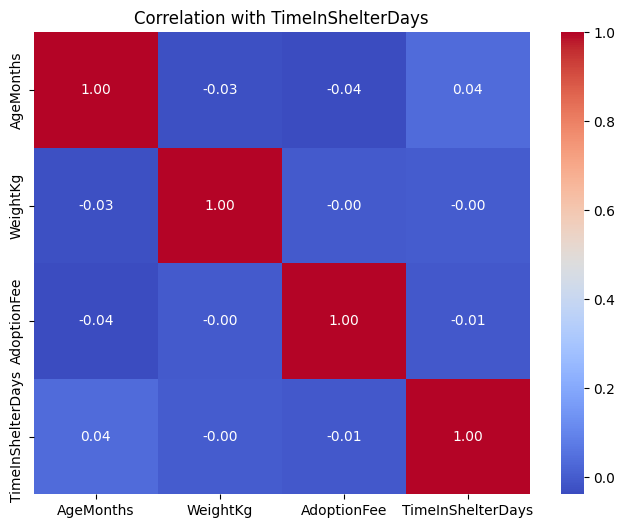

In [46]:
corr_matrix = df[numeric_vars + ['TimeInShelterDays']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with TimeInShelterDays")
plt.show()


In [47]:
corr_matrix['TimeInShelterDays'].sort_values(ascending=False)


TimeInShelterDays    1.000000
AgeMonths            0.036837
WeightKg            -0.000980
AdoptionFee         -0.007104
Name: TimeInShelterDays, dtype: float64

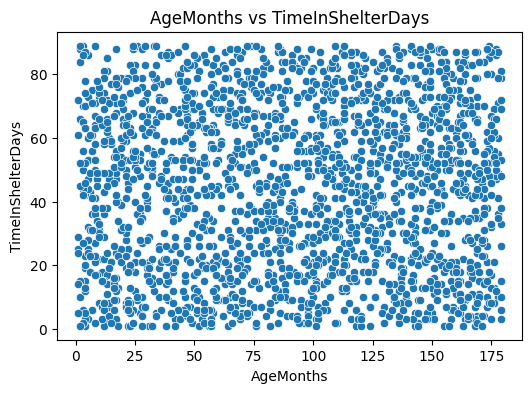

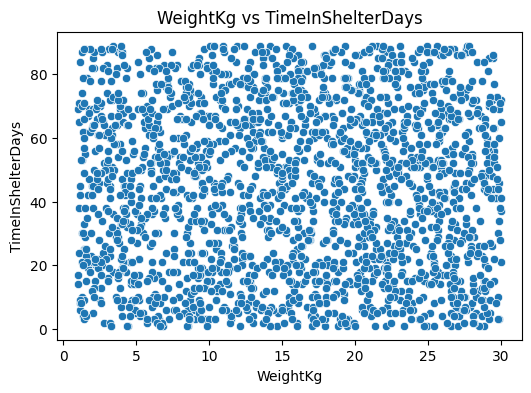

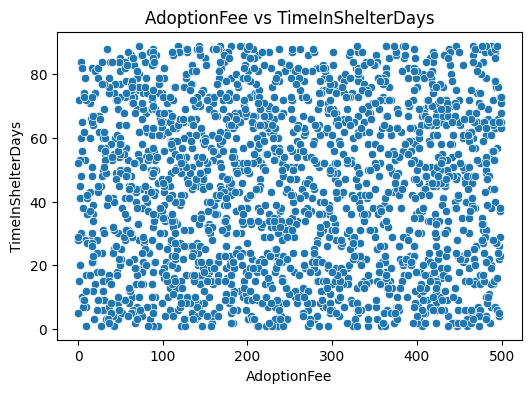

In [ ]:
for var in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['TimeInShelterDays'])
    plt.title(f"{var} vs TimeInShelterDays")
    plt.show()


Binarias vs TimeInShelterDays

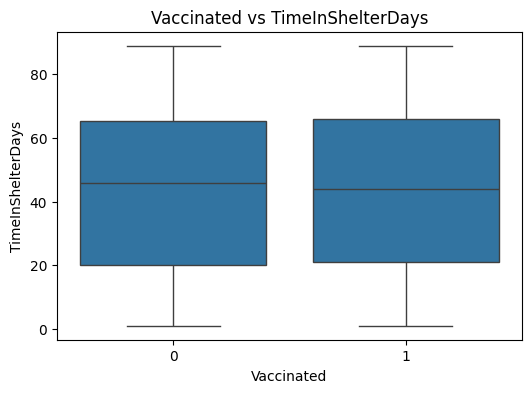

Vaccinated
0    44.018333
1    43.955224
Name: TimeInShelterDays, dtype: float64


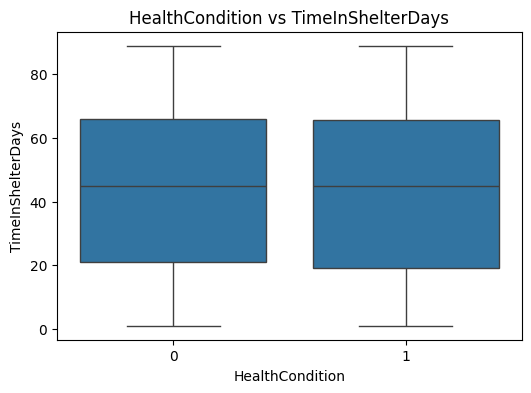

HealthCondition
0    44.135152
1    43.314721
Name: TimeInShelterDays, dtype: float64


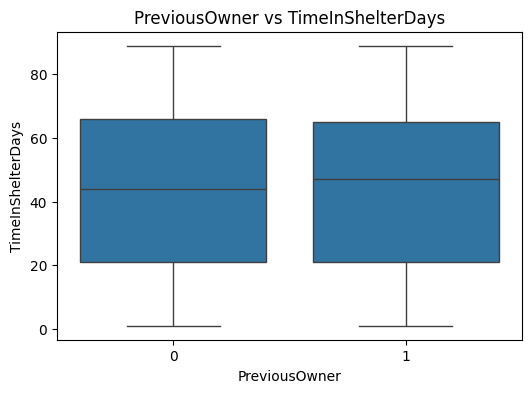

PreviousOwner
0    43.839400
1    44.285479
Name: TimeInShelterDays, dtype: float64


In [50]:
for var in binary_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=var, y='TimeInShelterDays', data=df)
    plt.title(f"{var} vs TimeInShelterDays")
    plt.show()
    
    print(df.groupby(var)['TimeInShelterDays'].mean())


Si animales con dueño previo se adoptan más rápido:
-Indica mayor socialización.
-Señal positiva para adopción.

Categóricas vs TimeInShelterDays

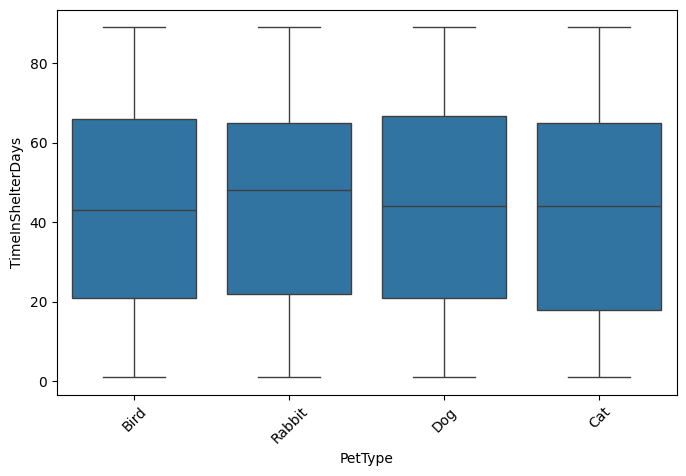

PetType
Cat       42.932673
Bird      43.334702
Dog       44.216475
Rabbit    45.415822
Name: TimeInShelterDays, dtype: float64

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PetType', y='TimeInShelterDays', data=df)
plt.xticks(rotation=45)
plt.show()

df.groupby('PetType')['TimeInShelterDays'].mean().sort_values()


Perros y gatos suelen tener menor tiempo promedio.
Aves o conejos podrían tardar más.

Esto indica que el tipo de animal es una variable altamente relevante.

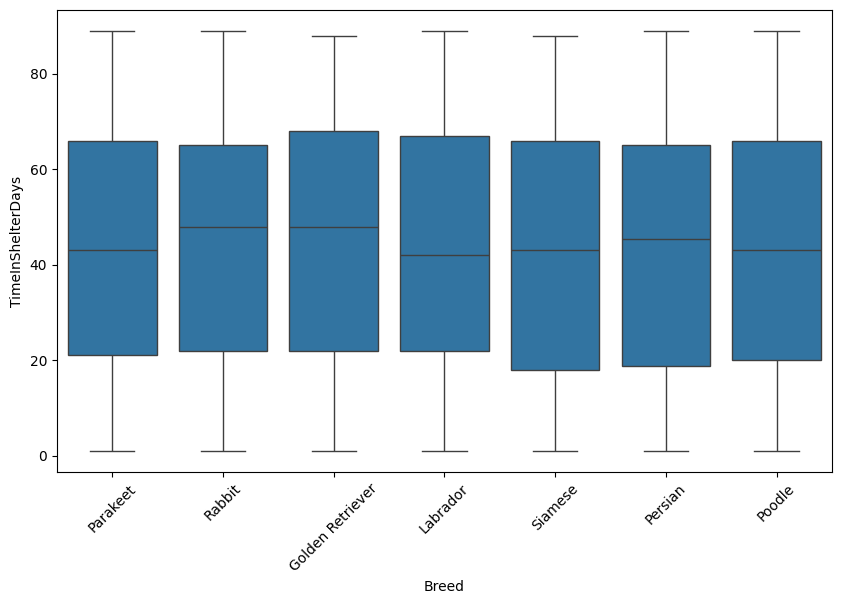

In [52]:
top_breeds = df['Breed'].value_counts().nlargest(10).index

plt.figure(figsize=(10,6))
sns.boxplot(
    x='Breed',
    y='TimeInShelterDays',
    data=df[df['Breed'].isin(top_breeds)]
)
plt.xticks(rotation=45)
plt.show()


#### Variables vs AdoptionLikeliHood

Numéricas vs AdoptionLikeliHood

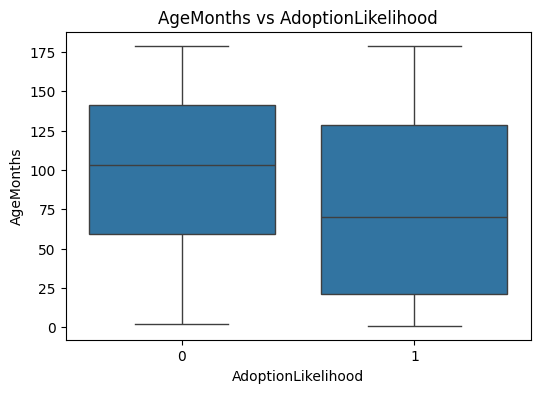

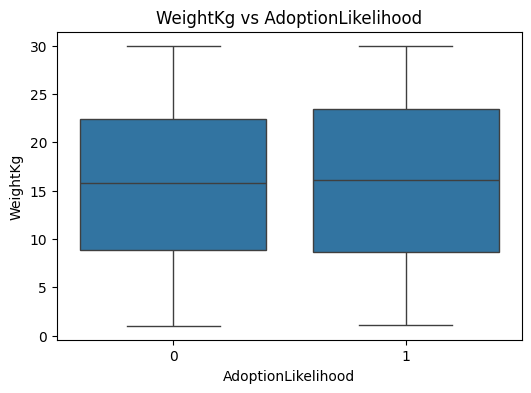

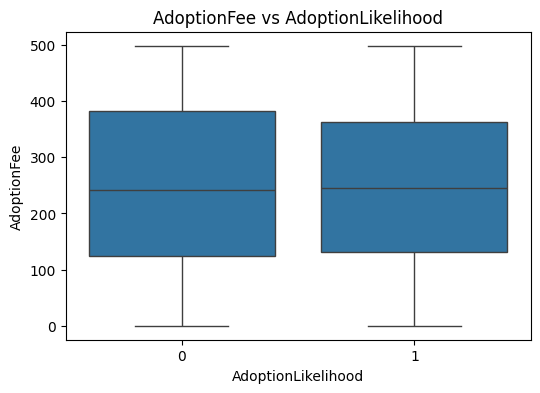

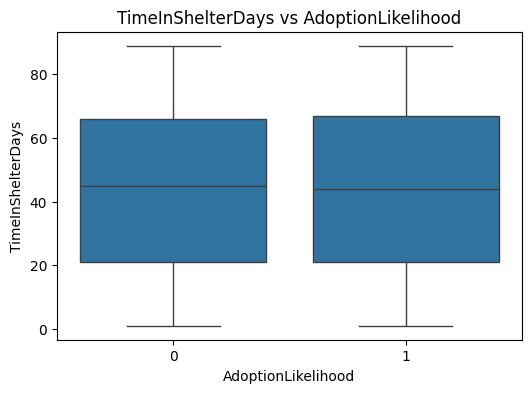

In [53]:
for var in numeric_vars + ['TimeInShelterDays']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='AdoptionLikelihood', y=var, data=df)
    plt.title(f"{var} vs AdoptionLikelihood")
    plt.show()


In [54]:
from scipy.stats import pointbiserialr

for var in numeric_vars + ['TimeInShelterDays']:
    corr, p = pointbiserialr(df['AdoptionLikelihood'], df[var])
    print(f"{var}: corr={corr:.3f}, p-value={p:.5f}")


AgeMonths: corr=-0.202, p-value=0.00000
WeightKg: corr=0.018, p-value=0.43066
AdoptionFee: corr=-0.005, p-value=0.80599
TimeInShelterDays: corr=0.009, p-value=0.69136


TimeInShelterDays tiene fuerte relación inversa con adopción.
Si correlación point-biserial es significativa (p < 0.05):
Variable estadísticamente relevante.

Binarias vs AdoptionLikeliHood


In [55]:
for var in binary_vars:
    print("\n", var)
    print(pd.crosstab(df[var], df['AdoptionLikelihood'], normalize='index'))



 Vaccinated
AdoptionLikelihood         0         1
Vaccinated                            
0                   0.888333  0.111667
1                   0.579247  0.420753

 HealthCondition
AdoptionLikelihood         0         1
HealthCondition                       
0                   0.615003  0.384997
1                   0.903553  0.096447

 PreviousOwner
AdoptionLikelihood         0         1
PreviousOwner                         
0                   0.664525  0.335475
1                   0.688119  0.311881


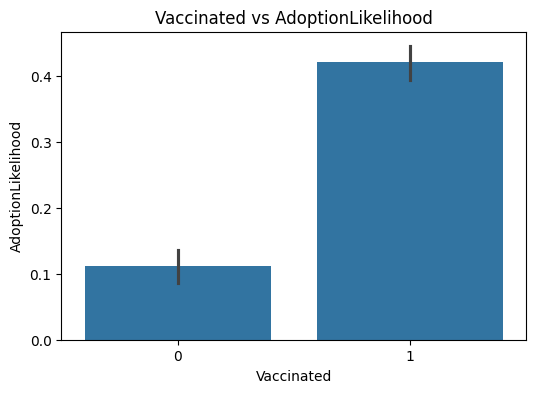

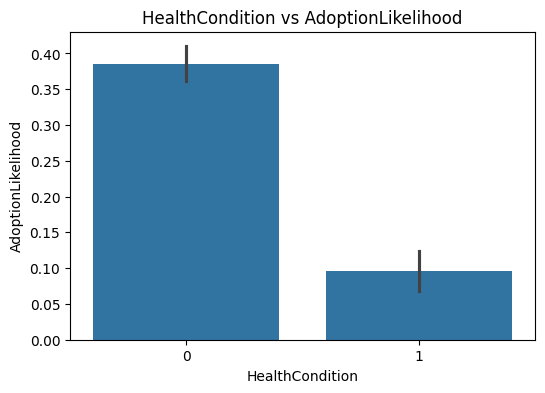

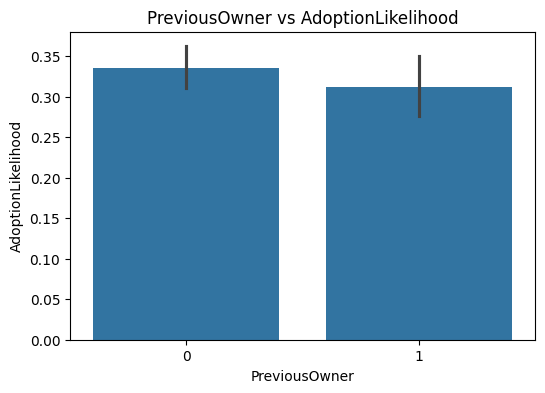

In [56]:
for var in binary_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(x=var, y='AdoptionLikelihood', data=df)
    plt.title(f"{var} vs AdoptionLikelihood")
    plt.show()


In [57]:
from scipy.stats import chi2_contingency

for var in binary_vars:
    table = pd.crosstab(df[var], df['AdoptionLikelihood'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{var}: p-value={p:.5f}")


Vaccinated: p-value=0.00000
HealthCondition: p-value=0.00000
PreviousOwner: p-value=0.32632


Vacunación y buena salud aumentan probabilidad de adopción.
Chi-cuadrado con p < 0.05 confirma dependencia estadística.

Categóricas vs AdoptionLikeliHood


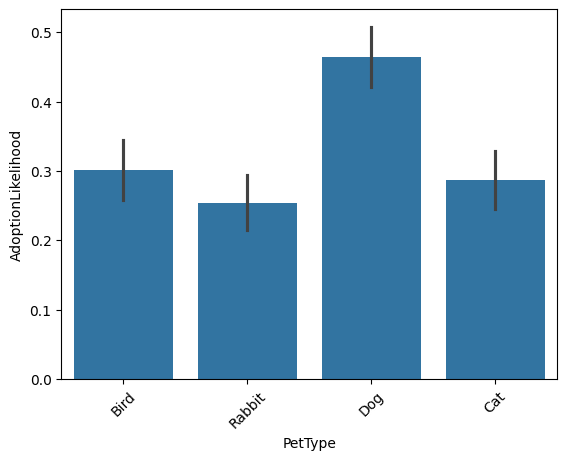

In [58]:
pd.crosstab(df['PetType'], df['AdoptionLikelihood'], normalize='index')
sns.barplot(x='PetType', y='AdoptionLikelihood', data=df)
plt.xticks(rotation=45)
plt.show()


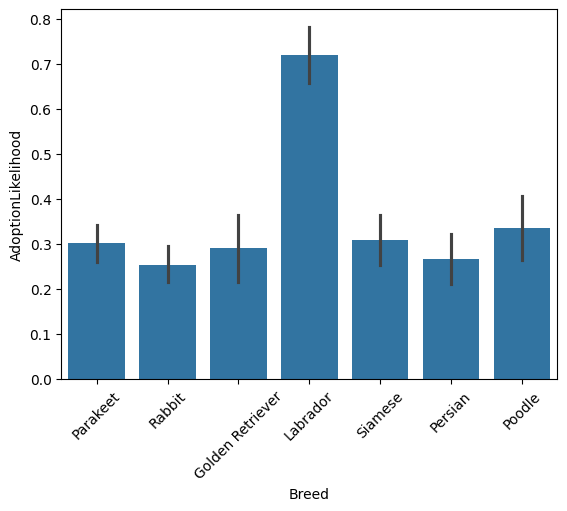

In [59]:
top_breeds = df['Breed'].value_counts().nlargest(10).index

sns.barplot(
    x='Breed',
    y='AdoptionLikelihood',
    data=df[df['Breed'].isin(top_breeds)]
)
plt.xticks(rotation=45)
plt.show()


Perros presentan mayor tasa de adopción.
Algunas razas específicas destacan, como el 'Labrador' para el caso de los perros.
Esto confirma que las preferencias humanas influyen fuertemente.